In [2]:

import os
import cv2
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import glob

import seaborn as sns
sns.set()

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATA_DIR = '/content/drive/My Drive/flowers'

CATEGORIES = []

for i in os.listdir(DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['tulip', 'dandelion', 'daisy', 'rose', 'sunflower']


In [ ]:

print(len(daisy_list))
print(len(dandelion_list))
print(len(rose_list))
print(len(sunflower_list))
print(len(tulip_list))

764
1052
784
733
984


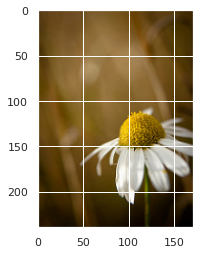

In [ ]:


img= load_img("../input/flowers-recognition/flowers/daisy/10437754174_22ec990b77_m.jpg")
plt.imshow(img)
plt.show()

In [ ]:
data_path= "../input/flowers-recognition/flowers"

In [ ]:

X= []
Y= []

for image in daisy_list:
    X.append(resize(imread(image), (64,64,3)))
    
for image in dandelion_list:
    X.append(resize(imread(image), (64,64,3)))
    
for image in rose_list:
    X.append(resize(imread(image), (64,64,3)))
    
for image in sunflower_list:
    X.append(resize(imread(image), (64,64,3)))

for image in tulip_list:
    X.append(resize(imread(image), (64,64,3)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  This is separate from the ipykernel package so we can avoid doing imports until


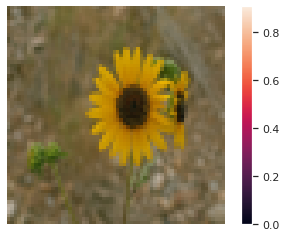

In [ ]:
plt.imshow(X[3000])
plt.axis("off")
plt.colorbar()
plt.show()

In [ ]:
x= img_to_array(X[200])
print(x.shape)

(64, 64, 3)


In [ ]:

class_name = glob.glob(data_path +'/*')
number_of_class= len(class_name)
print("Number of Class :", number_of_class)

Number of Class : 5


In [ ]:

model= Sequential()

model.add(Conv2D(64,(3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(number_of_class))
model.add(Activation("softmax"))

In [ ]:
batch_size=32

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics= ["accuracy"])

In [ ]:
# Data Generation (train-test)

train_datagen= ImageDataGenerator(rescale= 1./255,
                  shear_range=0.3,
                  horizontal_flip= True,
                  zoom_range=0.5)

test_datagen=  ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    data_path,
    target_size= x.shape[:2],
    batch_size=batch_size,
    color_mode= "rgb",
    class_mode="categorical")

test_generator= test_datagen.flow_from_directory(
    data_path,
    target_size= x.shape[:2],
    batch_size=batch_size,
    color_mode= "rgb",
    class_mode="categorical")

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


In [ ]:
hist= model.fit_generator(
    generator= train_generator,
    steps_per_epoch= 1600//batch_size,
    epochs= 100,
    validation_data= test_generator,
    validation_steps= 800// batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-12-13 14:53:07.817749: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
50/50 [==============================] - 23s 437ms/step - loss: 1.6877 - accuracy: 0.2688 - val_loss: 1.3520 - val_accuracy: 0.4000
Epoch 2/100
50/50 [==============================] - 22s 436ms/step - loss: 1.4005 - accuracy: 0.3719 - val_loss: 1.3909 - val_accuracy: 0.3762
Epoch 3/100
50/50 [==============================] - 22s 429ms/step - loss: 1.3265 - accuracy: 0.4471 - val_loss: 1.1803 - val_accuracy: 0.5250
Epoch 4/100
50/50 [==============================] - 21s 428ms/step - loss: 1.2209 - accuracy: 0.4991 - val_loss: 1.1519 - val_accuracy: 0.5275
Epoch 5/100
50/50 [==============================] - 22s 430ms/step - loss: 1.1079 - accuracy: 0.5479 - val_loss: 1.1519 - val_accuracy: 0.5138
Epoch 6/100
50/50 [==============================] - 22s 436ms/step - loss: 1.1084 - accuracy: 0.5512 - val_loss: 0.9591 - val_accuracy: 0.6338
Epoch 7/100
50/50 [==============================] - 21s 425ms/step - loss: 1.0757 - accuracy: 0.5794 - val_loss: 0.9336 - val_accuracy:

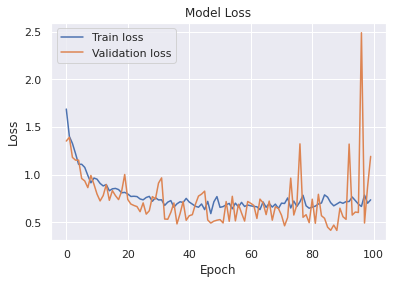

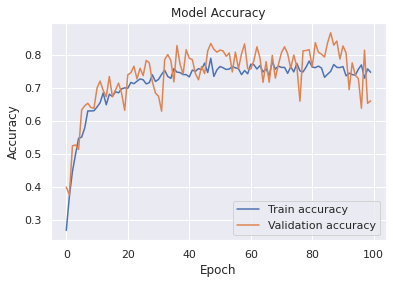

In [ ]:
# model evaluation

#Loss 
plt.plot(hist.history["loss"], label= "Train loss")
plt.plot(hist.history["val_loss"], label= "Validation loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.plot(hist.history["accuracy"], label= "Train accuracy")
plt.plot(hist.history["val_accuracy"], label= "Validation accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
print("Train loss:",hist.history["loss"][-1] )
print("Validation loss:",hist.history["val_loss"][-1] )
print("Train Accuracy:",hist.history["accuracy"][-1] )
print("Validation Accuracy:",hist.history["val_accuracy"][-1] )

Train loss: 0.7353337407112122
Validation loss: 1.191037893295288
Train Accuracy: 0.7476518750190735
Validation Accuracy: 0.6612499952316284


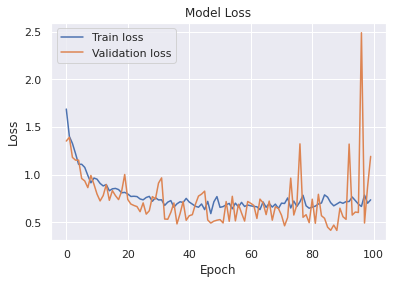

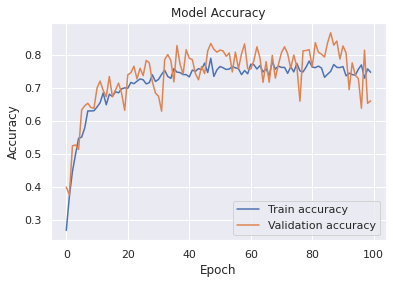

In [ ]:


import codecs
with codecs.open("./fruits_CNN.json","r", encoding= "utf-8") as f:
    h= json.loads(f.read())
    
#Loss 
plt.plot(h["loss"], label= "Train loss")
plt.plot(h["val_loss"], label= "Validation loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.plot(h["accuracy"], label= "Train accuracy")
plt.plot(h["val_accuracy"], label= "Validation accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()